#PackageのImport

In [102]:
import tensorflow
from tensorflow import keras
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
import os, cv2, random
import numpy as np
import pandas as pd

In [0]:
from matplotlib import ticker
import seaborn as sns

# トレーニングデータの作成

In [0]:
TRAIN_DIR = "/content/drive/My Drive/データ解析コンペ/Kaggle/dogscats/train.zip (Unzipped Files)/train/"
TEST_DIR = "/content/drive/My Drive/データ解析コンペ/Kaggle/dogscats/test.zip (Unzipped Files)/test/"

In [0]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
train_dogs = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

In [0]:
train_images = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR + i for i in os.listdir(TEST_DIR)]

In [0]:
train_images = train_dogs[:1000] + train_cats[:1000]

In [83]:
len(train_images)

2000

In [0]:
random.shuffle(train_images)

In [0]:
test_images = test_images[:25]

In [86]:
len(test_images)

25

# 画像ファイルを多次元列に変換する

In [0]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_CUBIC)

In [0]:
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

In [89]:
train = prep_data(train_images)
test = prep_data(test_images)

Processed 0 of 2000
Processed 250 of 2000
Processed 500 of 2000
Processed 750 of 2000
Processed 1000 of 2000
Processed 1250 of 2000
Processed 1500 of 2000
Processed 1750 of 2000
Processed 0 of 25


In [90]:
print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Train shape: (2000, 3, 64, 64)
Test shape: (25, 3, 64, 64)


In [0]:
labels = []
for i in train_images:
  if 'dog' in i:
    labels.append(1)
  else:
    labels.append(0)

# 画像の確認

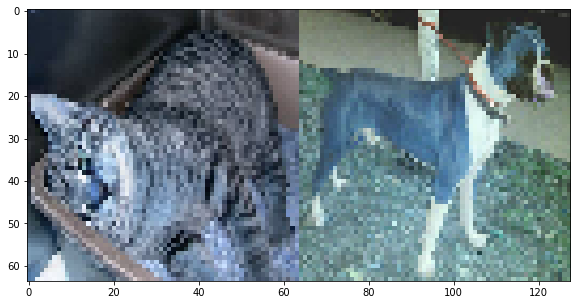

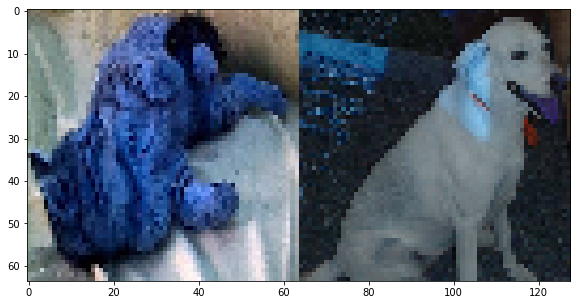

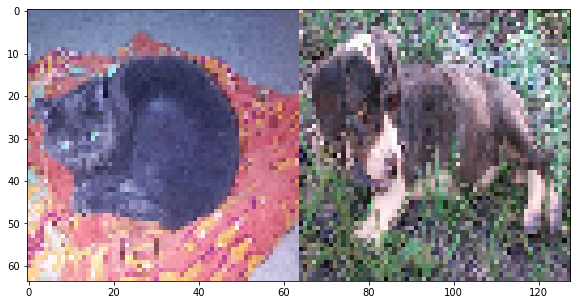

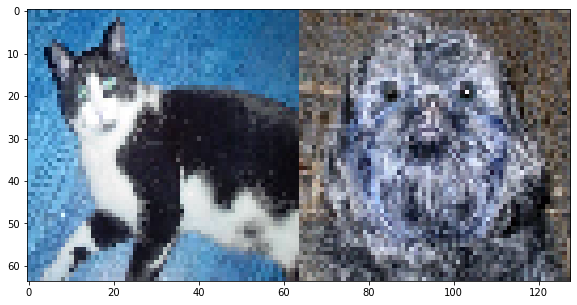

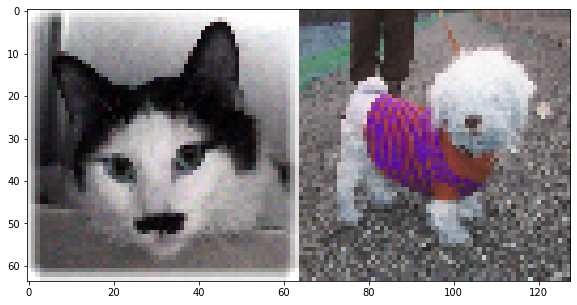

In [92]:
def show_cats_and_dogs(idx):
  cat = read_image(train_cats[idx])
  dog = read_image(train_dogs[idx])
  pair = np.concatenate((cat, dog), axis = 1)
  plt.figure(figsize = (10, 5))
  plt.imshow(pair)
  plt.show()

for idx in range(0, 5):
  show_cats_and_dogs(idx)

# 平均画像作成

Text(0.5, 1.0, 'Your Average Dog')

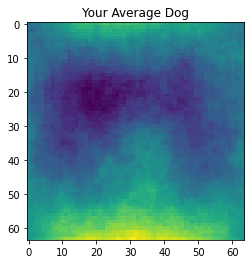

In [93]:
dog_avg = np.array([dog[0].T for i, dog in enumerate(train) if labels[i]==1]).mean(axis=0)
plt.imshow(dog_avg)
plt.title('Your Average Dog')

# CatDogNetモデルを作成

In [0]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D

In [0]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(ROWS, COLS, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

In [115]:
model.fit(train_dogs, train_cats, epochs=5)

AttributeError: ignored

In [0]:
def catdog():
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(ROWS, COLS, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

In [110]:
model = catdog()

AttributeError: ignored